In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_excel("FAOSTAT_data.xlsx")

In [3]:
# Pivot the dataframe to get separate columns for Area harvested, Yield, and Production
df_pivot = df.pivot_table(index=['Domain', 'Area Code (M49)', 'Area', 'Item Code (CPC)', 'Item', 'Year Code', 'Year'],
                              columns='Element',
                              values='Value',
                              aggfunc='first').reset_index()

# Flatten the multi-level columns
df_pivot.columns = [col if isinstance(col, str) else col[1] for col in df_pivot.columns]

# The dataframe now has separate columns for Area harvested, Yield, and Production
print(df_pivot.head())


                         Domain  Area Code (M49)         Area Item Code (CPC)  \
0  Crops and livestock products                4  Afghanistan               0   
1  Crops and livestock products                4  Afghanistan               0   
2  Crops and livestock products                4  Afghanistan             111   
3  Crops and livestock products                4  Afghanistan             111   
4  Crops and livestock products                4  Afghanistan             111   

     Item  Year Code  Year  Area harvested  Laying  Milk Animals  \
0  Grapes       2019  2019             NaN     NaN           NaN   
1  Grapes       2021  2021             NaN     NaN           NaN   
2   Wheat       2019  2019       2334000.0     NaN           NaN   
3   Wheat       2020  2020       2668000.0     NaN           NaN   
4   Wheat       2021  2021       2046564.0     NaN           NaN   

   Producing Animals/Slaughtered  Production  Stocks    Yield  \
0                            NaN   1112

In [4]:
df_pivot.isnull().sum()

Domain                               0
Area Code (M49)                      0
Area                                 0
Item Code (CPC)                      0
Item                                 0
Year Code                            0
Year                                 0
Area harvested                   44524
Laying                           91360
Milk Animals                     90315
Producing Animals/Slaughtered    74860
Production                       10481
Stocks                           83821
Yield                            41851
Yield/Carcass Weight             86116
dtype: int64

In [5]:
df_cleaned = df_pivot.drop(columns=['Laying', 'Milk Animals', 'Producing Animals/Slaughtered', 'Stocks', 'Yield/Carcass Weight'])

In [6]:
df_cleaned.value_counts()

Domain                        Area Code (M49)  Area         Item Code (CPC)  Item                    Year Code  Year  Area harvested  Production  Yield 
Crops and livestock products  894              Zambia       1970             Unmanufactured tobacco  2023       2023  20446.0         36137.26    1767.4    1
                              4                Afghanistan  111              Wheat                   2019       2019  2334000.0       4890000.00  2095.1    1
                                                                                                     2020       2020  2668000.0       5185000.00  1943.4    1
                                                                                                     2021       2021  2046564.0       4017657.00  1963.1    1
                                                                                                     2022       2022  1859339.0       3802895.00  2045.3    1
                                                         

In [7]:
df_cleaned["Area harvested"] = df_cleaned.groupby(["Item", "Area"])["Area harvested"].transform(lambda x: x.fillna(x.mean()))
df_cleaned["Yield"] = df_cleaned.groupby(["Item", "Area"])["Yield"].transform(lambda x: x.fillna(x.median()))
df_cleaned["Production"] = df_cleaned.groupby(["Item", "Area"])["Production"].transform(lambda x: x.fillna(x.mean()))

C:\Users\gowth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\gowth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\gowth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\gowth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarnin

In [8]:
df_cleaned = df_cleaned[~(df_cleaned["Item"].notna() & df_cleaned[["Area harvested", "Yield"]].isna().all(axis=1))]

In [10]:
df_cleaned = df_cleaned[~(df_cleaned["Item"].notna() & df_cleaned[["Area harvested"]].isna().all(axis=1))]

In [9]:
df_cleaned = df_cleaned[~(df_cleaned["Item"].notna() & df_cleaned[["Yield"]].isna().all(axis=1))]

In [11]:
df_cleaned.value_counts()

Domain                        Area Code (M49)  Area         Item Code (CPC)  Item                    Year Code  Year  Area harvested  Production  Yield  
Crops and livestock products  894              Zambia       1970.0           Unmanufactured tobacco  2023       2023  20446.0         36137.26    1767.4     1
                              4                Afghanistan  0.0              Grapes                  2019       2019  92084.4         1112927.00  10729.5    1
                                                                                                     2021       2021  92084.4         1019197.00  10727.9    1
                                                            111.0            Wheat                   2019       2019  2334000.0       4890000.00  2095.1     1
                                                                                                     2020       2020  2668000.0       5185000.00  1943.4     1
                                                   

In [12]:
df_cleaned.isnull().sum()

Domain             0
Area Code (M49)    0
Area               0
Item Code (CPC)    0
Item               0
Year Code          0
Year               0
Area harvested     0
Production         0
Yield              0
dtype: int64

In [13]:
df_cleaned = df_cleaned[
    ~((df_cleaned['Area harvested'] == 0) &
      (df_cleaned['Yield'] == 0) &
      (df_cleaned['Production'] == 0))
]

In [14]:
df_cleaned = df_cleaned.drop_duplicates()

In [15]:
df_cleaned.value_counts()

Domain                        Area Code (M49)  Area         Item Code (CPC)  Item                    Year Code  Year  Area harvested  Production  Yield  
Crops and livestock products  894              Zambia       1970.0           Unmanufactured tobacco  2023       2023  20446.0         36137.26    1767.4     1
                              4                Afghanistan  0.0              Grapes                  2019       2019  92084.4         1112927.00  10729.5    1
                              894              Zambia       1709.9           Other pulses n.e.c.     2022       2022  65151.0         31013.20    476.0      1
                                                                                                     2021       2021  64587.0         30774.38    476.5      1
                                                                                                     2020       2020  64968.0         30869.05    475.1      1
                                                   

In [16]:
Q1 = df_cleaned[['Area harvested', 'Yield', 'Production']].quantile(0.25)
Q3 = df_cleaned[['Area harvested', 'Yield', 'Production']].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[~(
    (df_cleaned[['Area harvested', 'Yield', 'Production']] < (Q1 - 1.5 * IQR)) |
    (df_cleaned[['Area harvested', 'Yield', 'Production']] > (Q3 + 1.5 * IQR))
).any(axis=1)]

In [17]:
df_cleaned.value_counts()

Domain                        Area Code (M49)  Area         Item Code (CPC)  Item                    Year Code  Year  Area harvested  Production  Yield 
Crops and livestock products  894              Zambia       1970.0           Unmanufactured tobacco  2023       2023  20446.0         36137.26    1767.4    1
                              4                Afghanistan  115.0            Barley                  2021       2021  40273.0         65102.00    1616.5    1
                              894              Zambia       1706.0           Cow peas, dry           2023       2023  10004.0         5700.99     569.9     1
                                                                                                     2022       2022  14970.0         8138.47     543.7     1
                                                                                                     2021       2021  24955.0         12451.95    499.0     1
                                                         

In [18]:
df_cleaned['Production'] = df_cleaned.pop('Production')

In [19]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = df_cleaned.select_dtypes(exclude=['number']).columns

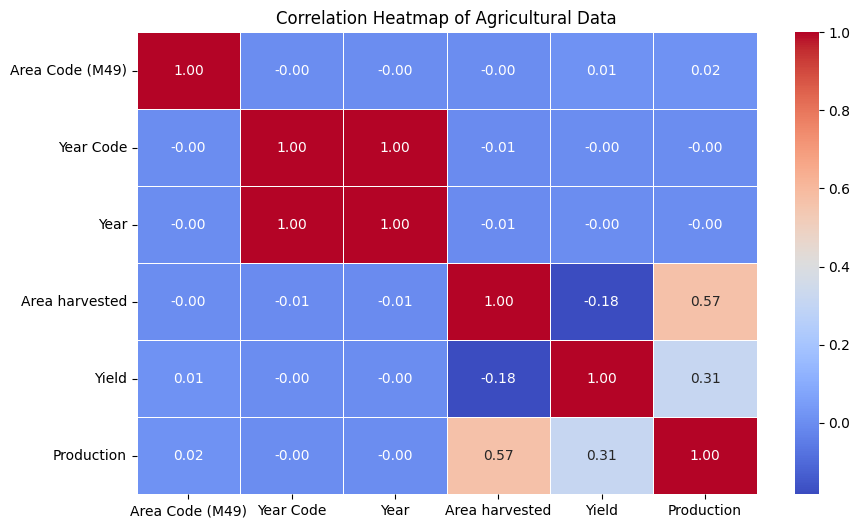

In [20]:
corr_matrix = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(10, 6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Agricultural Data")  # Title
plt.show()

In [21]:
df_cleaned = df_cleaned[~(df_cleaned['Production'] == 0)]

In [22]:
df_cleaned["Item Code (CPC)"] = df_cleaned["Item Code (CPC)"].astype(int)

In [23]:
print(df_cleaned.dtypes)

Domain              object
Area Code (M49)      int64
Area                object
Item Code (CPC)      int64
Item                object
Year Code            int64
Year                 int64
Area harvested     float64
Yield              float64
Production         float64
dtype: object


In [24]:
#since year code and year column are same dropping year code
df_cleaned.drop('Year Code', axis=1, inplace=True)

In [25]:
df_cleaned

,Domain,Area Code (M49),Area,Item Code (CPC),Item,Year,Area harvested,Yield,Production
19,Crops and livestock products,4,Afghanistan,115,Barley,2021,40273.0,1616.5,65102.00
20,Crops and livestock products,4,Afghanistan,115,Barley,2022,61952.0,1528.4,94687.00
22,Crops and livestock products,4,Afghanistan,118,Millet,2019,1401.0,1937.2,2714.00
23,Crops and livestock products,4,Afghanistan,118,Millet,2020,1437.0,1318.7,1895.00
24,Crops and livestock products,4,Afghanistan,118,Millet,2021,979.0,1583.2,1550.00
...,...,...,...,...,...,...,...,...,...
92418,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2019,6382.0,993.2,6338.22
92419,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2020,6177.0,1034.3,6388.82
92420,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2021,6934.0,974.5,6757.73
92421,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2022,6388.0,912.5,5828.86


Top 10 Most Cultivated Crops:
 Item
Other vegetables, fresh n.e.c.    661
Other fruits, n.e.c.              608
Unmanufactured tobacco            556
Cabbages                          511
Pumpkins, squash and gourds       499
Other beans, green                490
Green garlic                      488
Lemons and limes                  458
Other pulses n.e.c.               457
Oranges                           447
Name: count, dtype: int64

Least Cultivated Crops:
 Item
Karite nuts (sheanuts)      20
Peppermint, spearmint       19
Cashewapple                 15
Ramie, raw or retted        15
Quinoa                      11
Kola nuts                   10
Other sugar crops n.e.c.     5
Jojoba seeds                 5
Mat� leaves                  5
Kapok fruit                  5
Name: count, dtype: int64


C:\Users\gowth\AppData\Local\Temp\ipykernel_26736\3507742496.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")


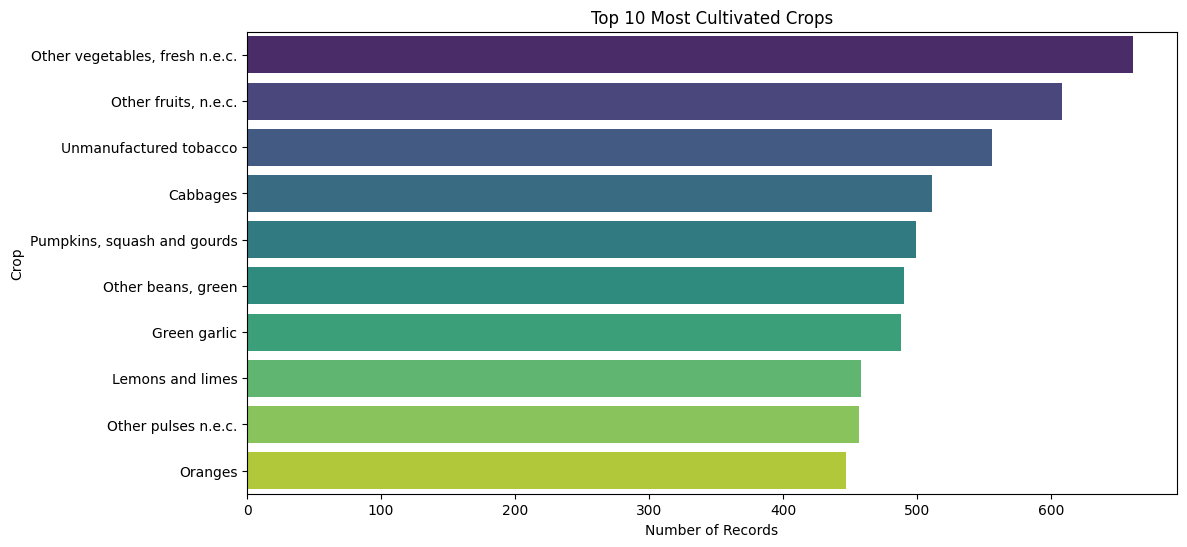

In [26]:
crop_distribution = df_cleaned['Item'].value_counts()

# Display the top 10 most cultivated crops
print("Top 10 Most Cultivated Crops:\n", crop_distribution.head(10))

# Display the 10 least cultivated crops
print("\nLeast Cultivated Crops:\n", crop_distribution.tail(10))

top_crops = crop_distribution.head(10)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")
plt.xlabel("Number of Records")
plt.ylabel("Crop")
plt.title("Top 10 Most Cultivated Crops")
plt.show()

Top 10 Regions with Most Agricultural Activity:
 Area
Peru               358
Ecuador            356
Mexico             331
Morocco            331
Bhutan             319
North Macedonia    316
Kyrgyzstan         315
Tunisia            312
Kenya              312
Zimbabwe           307
Name: count, dtype: int64

Least Active Agricultural Regions:
 Area
Bahrain             43
India               43
Kiribati            30
Tuvalu              25
Tokelau             20
Iceland             20
Malta               14
Faroe Islands        5
Marshall Islands     5
China, Macao SAR     5
Name: count, dtype: int64


C:\Users\gowth\AppData\Local\Temp\ipykernel_26736\4026845651.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette="viridis")


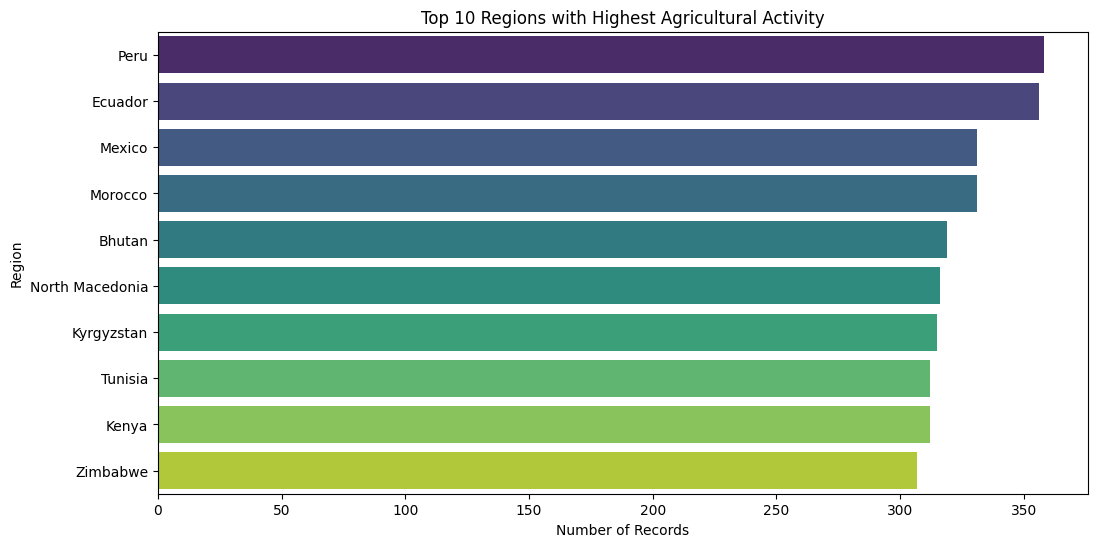

In [27]:
region_distribution = df_cleaned['Area'].value_counts()

# Display the top 10 regions with the most agricultural data
print("Top 10 Regions with Most Agricultural Activity:\n", region_distribution.head(10))

# Display the 10 regions with the least data
print("\nLeast Active Agricultural Regions:\n", region_distribution.tail(10))
top_regions = region_distribution.head(10)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette="viridis")
plt.xlabel("Number of Records")
plt.ylabel("Region")
plt.title("Top 10 Regions with Highest Agricultural Activity")
plt.show()

In [28]:
yearly_trends = df_cleaned.groupby("Year")[["Area harvested", "Yield", "Production"]].sum()

# Display the aggregated data
print(yearly_trends)

      Area harvested        Yield    Production
Year                                           
2019    4.839699e+07  54117120.70  2.706202e+08
2020    4.805476e+07  53539370.10  2.656729e+08
2021    4.787982e+07  53598891.05  2.688913e+08
2022    4.810151e+07  54152419.40  2.711132e+08
2023    4.698090e+07  54016587.30  2.641820e+08


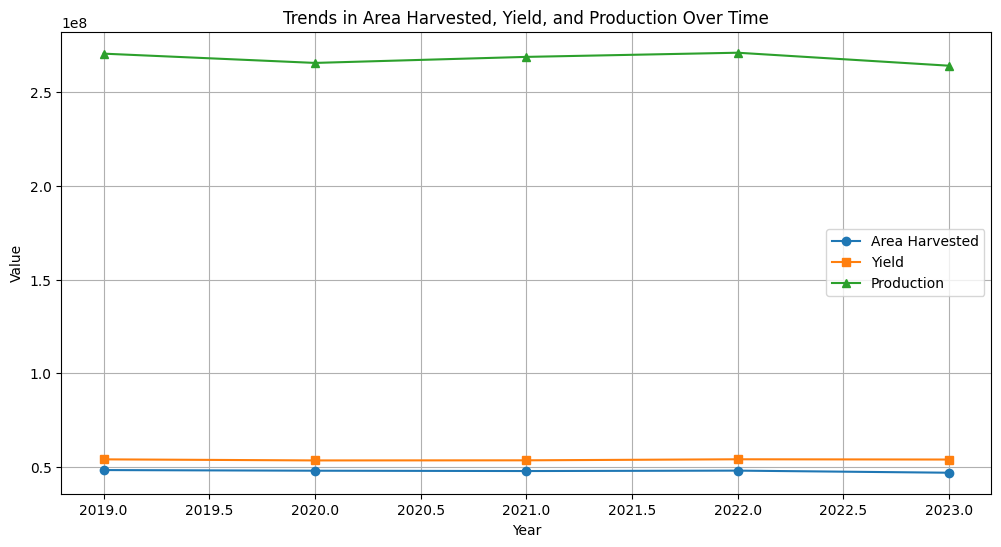

In [29]:
plt.figure(figsize=(12,6))
plt.plot(yearly_trends.index, yearly_trends["Area harvested"], marker='o', linestyle='-', label="Area Harvested")
plt.plot(yearly_trends.index, yearly_trends["Yield"], marker='s', linestyle='-', label="Yield")
plt.plot(yearly_trends.index, yearly_trends["Production"], marker='^', linestyle='-', label="Production")

# Formatting
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Trends in Area Harvested, Yield, and Production Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
crop_trends = df_cleaned.groupby(["Year", "Item"])[["Yield", "Production"]].sum().reset_index()

# Display the data
print(crop_trends.head())

   Year                                               Item     Yield  \
0  2019                            Abaca, manila hemp, raw    4554.6   
1  2019                          Agave fibres, raw, n.e.c.    5968.8   
2  2019                                  Almonds, in shell  120402.4   
3  2019  Anise, badian, coriander, cumin, caraway, fenn...   60032.8   
4  2019                                             Apples  638576.5   

   Production  
0    40723.68  
1    39590.24  
2   986040.22  
3   447306.59  
4  4770443.30  


In [31]:
crop_yield = df_cleaned.groupby("Item")["Yield"].mean().reset_index()

# Sort crops by yield (highest to lowest)
crop_yield = crop_yield.sort_values(by="Yield", ascending=False)

# Display top and bottom crops
print("📌 Top 5 High-Yield Crops:")
print(crop_yield.head())

print("\n📌 Bottom 5 Low-Yield Crops:")
print(crop_yield.tail())

📌 Top 5 High-Yield Crops:
                                      Item         Yield
18                                Cabbages  20651.215068
137                             Sugar beet  19022.483951
152                            Watermelons  18290.513239
138                             Sugar cane  17827.552778
65   Leeks and other alliaceous vegetables  17471.158848

📌 Bottom 5 Low-Yield Crops:
                         Item       Yield
36                Cocoa beans  516.450000
58               Jojoba seeds  472.740000
119  Pyrethrum, dried flowers  387.751429
149              Vanilla, raw  364.183333
64                  Kola nuts  293.950000


In [32]:
region_production = df_cleaned.groupby("Area")["Production"].sum().reset_index()

# Sort by highest production
region_production = region_production.sort_values(by="Production", ascending=False)

# Display top and bottom regions
print("📌 Top 5 Highly Productive Regions:")
print(region_production.head())

print("\n📌 Bottom 5 Low-Production Regions:")
print(region_production.tail())

📌 Top 5 Highly Productive Regions:
                           Area    Production
140                        Peru  2.320229e+07
85   Iran (Islamic Republic of)  2.082878e+07
89                        Italy  2.015878e+07
66                       France  1.977696e+07
12                   Bangladesh  1.969891e+07

📌 Bottom 5 Low-Production Regions:
                 Area  Production
179           Tokelau    25381.23
184            Tuvalu    20160.70
123             Nauru    14397.97
63      Faroe Islands     7606.56
36   China, Macao SAR     1098.63


In [33]:
avg_yield = df_cleaned.groupby(['Area', 'Item'])['Yield'].mean().reset_index()

# Sort by yield in descending order to see high yield values at the top
avg_yield_sorted = avg_yield.sort_values(by='Yield', ascending=False)
print(avg_yield_sorted.head(10))



                              Area                       Item         Yield
6966                      Zimbabwe                    Oranges  34000.000000
443                        Bahrain  Cauliflowers and broccoli  34000.000000
635                          Benin                 Sugar cane  33954.433333
277                      Australia     Cucumbers and gherkins  33939.700000
2744                        Guyana           Lemons and limes  33937.100000
5493                  Saudi Arabia                    Papayas  33871.500000
36                         Albania                   Cabbages  33855.800000
1194                         Chile                      Pears  33778.100000
4365  Netherlands (Kingdom of the)                      Pears  33763.700000
3034                       Ireland                   Potatoes  33762.700000


In [34]:
df_cleaned['Productivity Ratio'] = df_cleaned.apply(lambda row: row['Production'] / row['Area harvested'] if row['Area harvested'] > 0 else None, axis=1)

# Display the first few rows
print(df_cleaned[['Area', 'Item', 'Year', 'Production', 'Area harvested', 'Yield', 'Productivity Ratio']].head(10))

           Area                                             Item  Year  \
19  Afghanistan                                           Barley  2021   
20  Afghanistan                                           Barley  2022   
22  Afghanistan                                           Millet  2019   
23  Afghanistan                                           Millet  2020   
24  Afghanistan                                           Millet  2021   
25  Afghanistan                                           Millet  2022   
26  Afghanistan                                           Millet  2023   
27  Afghanistan                                       Soya beans  2022   
28  Afghanistan                                       Soya beans  2023   
48  Afghanistan  Onions and shallots, dry (excluding dehydrated)  2019   

    Production  Area harvested    Yield  Productivity Ratio  
19    65102.00         40273.0   1616.5            1.616517  
20    94687.00         61952.0   1528.4            1.528393  

In [35]:
df_cleaned

,Domain,Area Code (M49),Area,Item Code (CPC),Item,Year,Area harvested,Yield,Production,Productivity Ratio
19,Crops and livestock products,4,Afghanistan,115,Barley,2021,40273.0,1616.5,65102.00,1.616517
20,Crops and livestock products,4,Afghanistan,115,Barley,2022,61952.0,1528.4,94687.00,1.528393
22,Crops and livestock products,4,Afghanistan,118,Millet,2019,1401.0,1937.2,2714.00,1.937188
23,Crops and livestock products,4,Afghanistan,118,Millet,2020,1437.0,1318.7,1895.00,1.318720
24,Crops and livestock products,4,Afghanistan,118,Millet,2021,979.0,1583.2,1550.00,1.583248
...,...,...,...,...,...,...,...,...,...,...
92418,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2019,6382.0,993.2,6338.22,0.993140
92419,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2020,6177.0,1034.3,6388.82,1.034292
92420,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2021,6934.0,974.5,6757.73,0.974579
92421,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2022,6388.0,912.5,5828.86,0.912470


In [36]:
df_cleaned.drop('Domain', axis=1, inplace=True)

In [37]:
df_cleaned.drop('Productivity Ratio', axis=1, inplace=True)

In [38]:
print(df_cleaned.dtypes)

Area Code (M49)      int64
Area                object
Item Code (CPC)      int64
Item                object
Year                 int64
Area harvested     float64
Yield              float64
Production         float64
dtype: object


In [39]:
df_ = pd.get_dummies(df_cleaned, columns=['Area', 'Item'], drop_first=True)

In [40]:
print(df_.dtypes)

Area Code (M49)             int64
Item Code (CPC)             int64
Year                        int64
Area harvested            float64
Yield                     float64
                           ...   
Item_Walnuts, in shell       bool
Item_Watermelons             bool
Item_Wheat                   bool
Item_Yams                    bool
Item_Yautia                  bool
Length: 360, dtype: object


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define input & output variables
X = df_.drop(columns=['Production'])  # Features
y = df_['Production']  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [43]:
mse = mean_squared_error(y_test, y_pred)

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 4. R-Squared (R2)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"Mean Squared Error (MSE) : {mse}")
print(f"Mean Absolute Error (MAE) : {mae}")
print(f"Root Mean Squared Error (RMSE) : {rmse}")
print(f"R2 Score : {r2}")

Mean Squared Error (MSE) : 2203552376.163646
Mean Absolute Error (MAE) : 30990.53188798287
Root Mean Squared Error (RMSE) : 46942.01078100134
R2 Score : 0.5704122327386958


In [44]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R² Score: 0.9996
Mean Squared Error (MSE): 2178340.6068
Mean Absolute Error (MAE): 454.5536


In [46]:
import joblib

In [48]:
joblib.dump(rf_model, "production_model.pkl")
print("Model Saved Successfully!")

Model Saved Successfully!


In [49]:
model = joblib.load("production_model.pkl")  
joblib.dump(model, "new_production_model.pkl")

['new_production_model.pkl']